# 📌 Introduction

 📌 Introduction


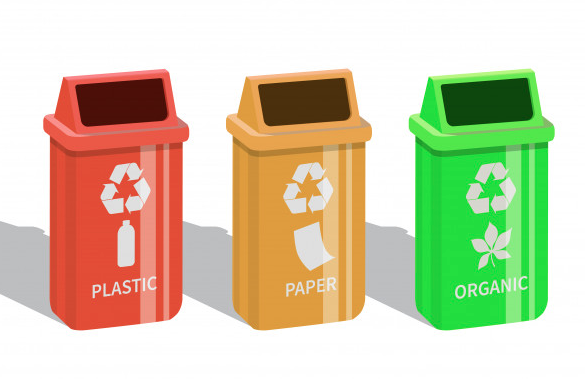













 Waste is a global issue :

 * Increasing volumes of waste are being generated as the global population are rising day by day living standards .

 * People are increasingly concerned about the production of waste and its effect, and are seeking ways to deal with the problem.

RECYCLING :

* Recycling is the process of converting waste materials into new materials and objects.

* The recovery of energy from waste materials is often included in this concept.

* It reduce the consumption of fresh raw materials, thereby reducing: energy usage, air pollution,soil pollution and water pollution .

* Recollection of waste includes a confusion of type of material in the group of waste, hence its important to classity it's type  

🟢 In this notebook, we will classify waste as organic or recyclable using Convolutional Neural Network


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import cv2

import warnings
warnings.filterwarnings('ignore')


In [2]:

!pip install kaggle


import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content'


!kaggle datasets download -d techsash/waste-classification-data


import zipfile
with zipfile.ZipFile('/content/waste-classification-data.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/waste_classification')

print("Path to dataset files:", '/content/waste_classification')


Dataset URL: https://www.kaggle.com/datasets/techsash/waste-classification-data
License(s): CC-BY-SA-4.0
100% 426M/427M [00:20<00:00, 24.1MB/s]
100% 427M/427M [00:20<00:00, 21.8MB/s]
Path to dataset files: /content/waste_classification


In [3]:
train_path = "/content/waste_classification/DATASET/TRAIN/"
test_path = "/content/waste_classification/DATASET/TEST/"

In [4]:
!pip install tensorflow
import tensorflow as tf


# Importing Libraries

In [5]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.utils import plot_model
from glob import glob

# Visualization

In [6]:
x_data = []
y_data = []

for category in glob(train_path+'/*'):
    for file in tqdm(glob(category+'/*')):
        img_array=cv2.imread(file)
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        x_data.append(img_array)
        y_data.append(category.split("/")[-1])

data=pd.DataFrame({'image': x_data,'label': y_data})

100%|██████████| 12565/12565 [00:08<00:00, 1557.48it/s]


In [7]:
data.shape

(22564, 2)

In [8]:
from collections import Counter
Counter(y_data)

Counter({'R': 9999, 'O': 12565})

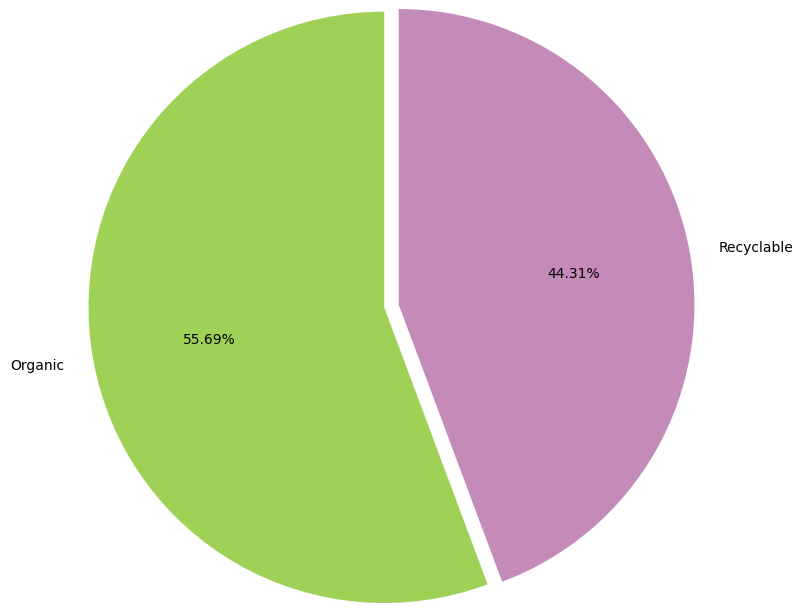

In [9]:
colors = ['#a0d157','#c48bb8']
plt.pie(data.label.value_counts(),startangle=90,explode=[0.05,0.05],autopct='%0.2f%%',
        labels=['Organic', 'Recyclable'], colors= colors,radius=2)
plt.show()

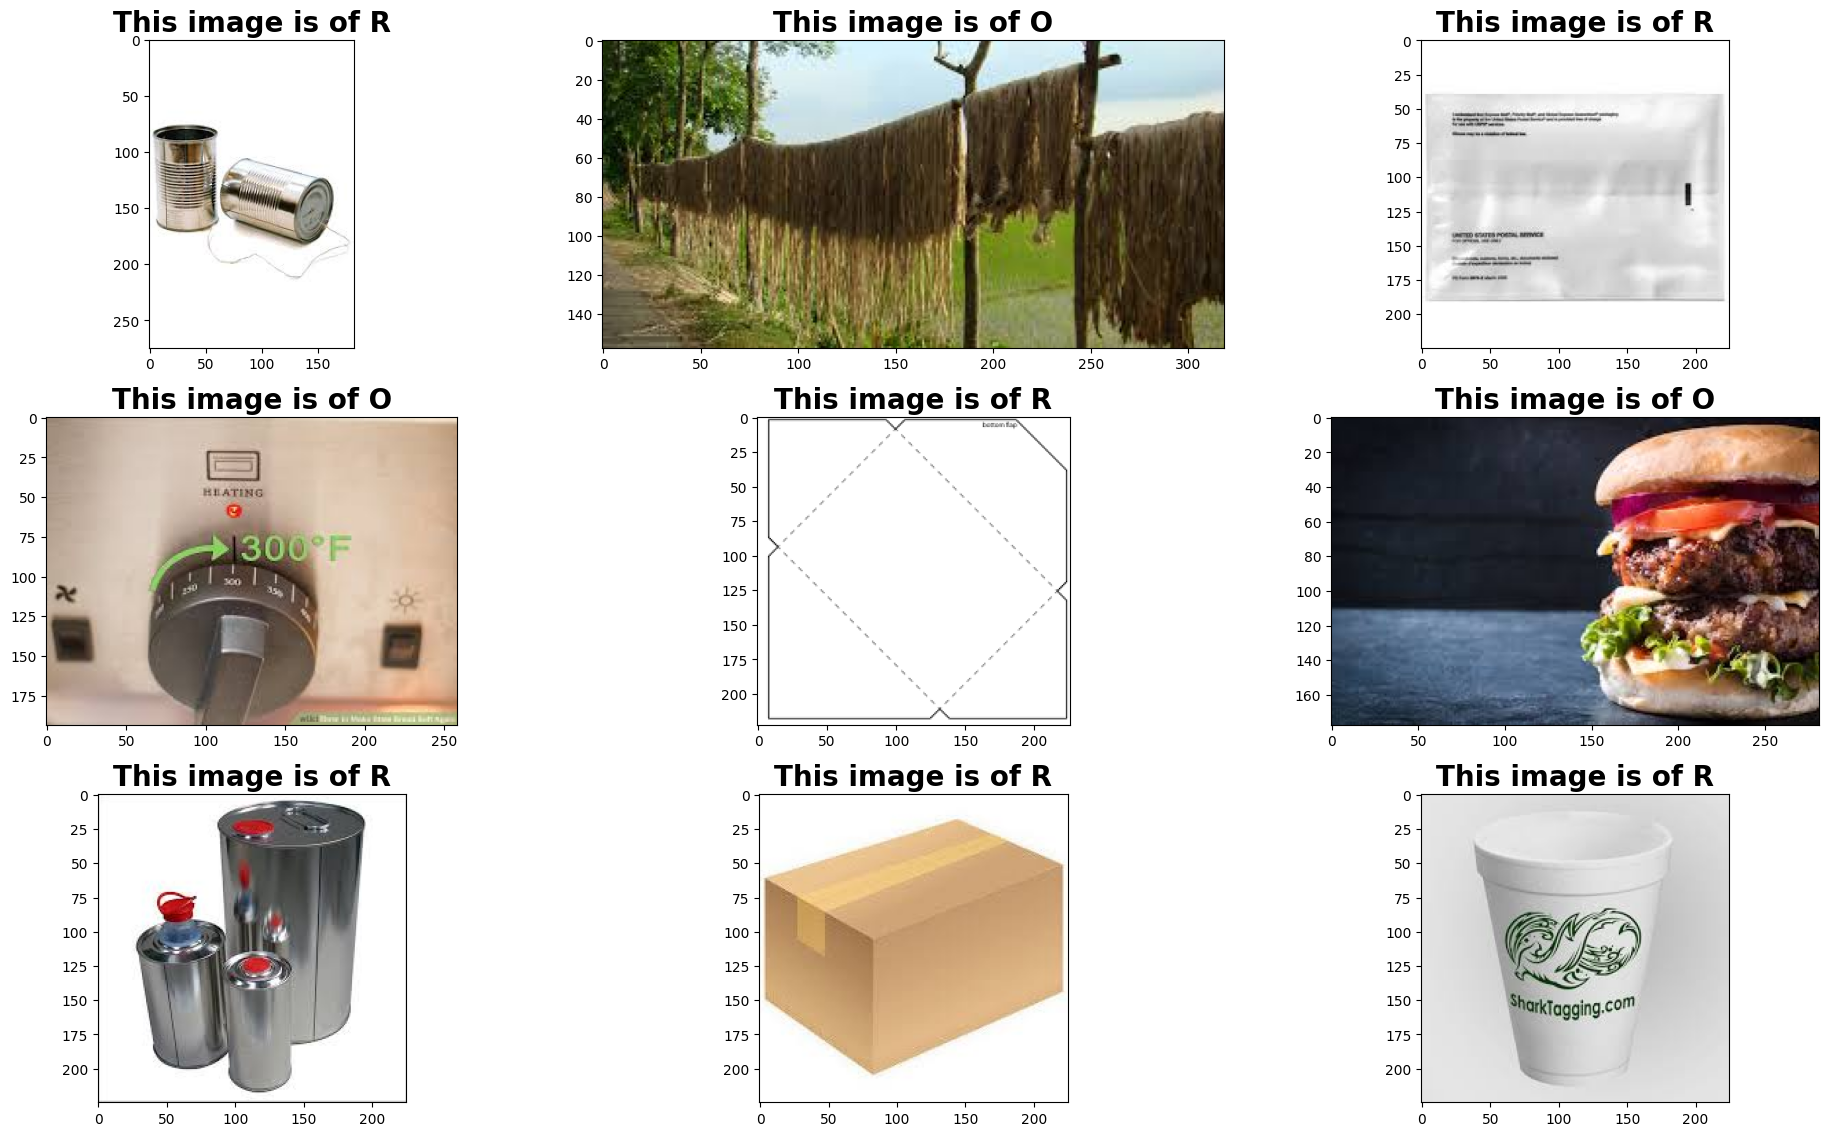

In [10]:
plt.figure(figsize=(20,15))
for i in range(9):
    plt.subplot(4,3,(i%12)+1)
    index=np.random.randint(15000)
    plt.title('This image is of {0}'.format(data.label[index]),fontdict={'size':20,'weight':'bold'})
    plt.imshow(data.image[index])
    plt.tight_layout()

In [11]:
className = glob(train_path + '/*' )
numberOfClass = len(className)
print("Number Of Class: ",numberOfClass)

Number Of Class:  2


# Convolutional Neural Network


In [12]:
model = Sequential()
model.add(Conv2D(32,(3,3),input_shape = (224,224,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(128,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(256))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(64))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(numberOfClass)) # output
model.add(Activation("sigmoid"))

model.compile(loss = "binary_crossentropy",
              optimizer = "adam",
              metrics = ["accuracy"])

batch_size = 256

In [13]:
pip install pydot

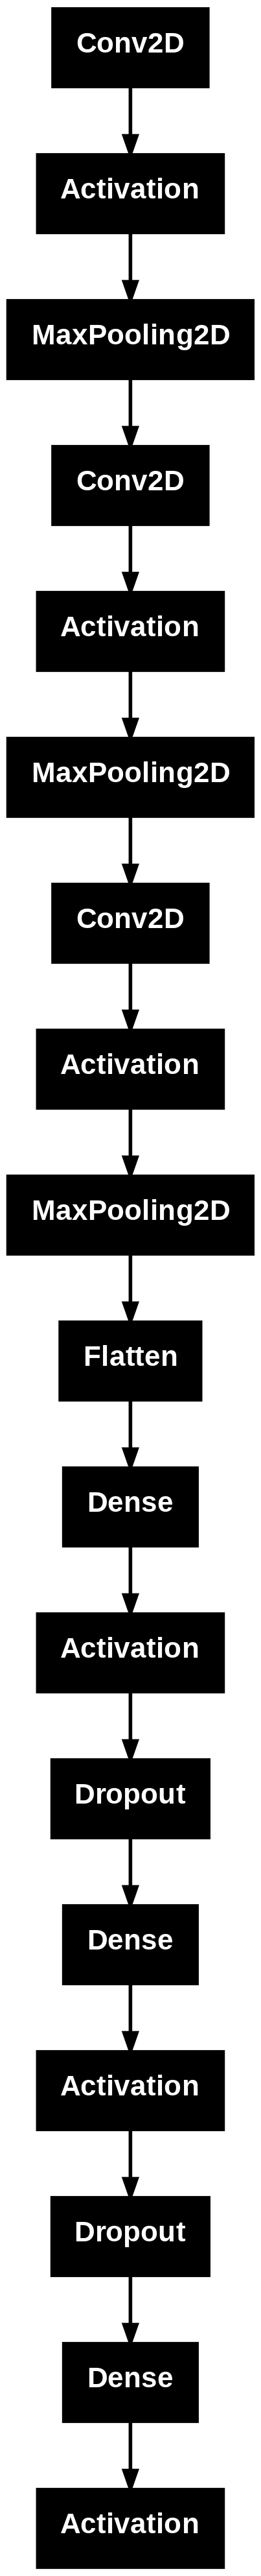

In [14]:
plot_model(model)

In [15]:
train_datagen = ImageDataGenerator(rescale= 1./255)

In [16]:
test_datagen = ImageDataGenerator(rescale= 1./255)

In [17]:
train_generator = train_datagen.flow_from_directory(
        train_path,
        target_size= (224,224),
        batch_size = batch_size,
        color_mode= "rgb",
        class_mode= "categorical")

test_generator = test_datagen.flow_from_directory(
        test_path,
        target_size= (224,224),
        batch_size = batch_size,
        color_mode= "rgb",
        class_mode= "categorical")

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [18]:
hist= model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)

Epoch 1/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 119s 982ms/step - accuracy: 0.7021 - loss: 0.6456 - val_accuracy: 0.8484 - val_loss: 0.3844
Epoch 2/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 91s 697ms/step - accuracy: 0.8329 - loss: 0.4134 - val_accuracy: 0.8850 - val_loss: 0.3319
Epoch 3/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 84s 732ms/step - accuracy: 0.8490 - loss: 0.3830 - val_accuracy: 0.8842 - val_loss: 0.3055
Epoch 4/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 79s 697ms/step - accuracy: 0.8654 - loss: 0.3455 - val_accuracy: 0.8854 - val_loss: 0.2754
Epoch 5/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 64s 680ms/step - accuracy: 0.8749 - loss: 0.3194 - val_accuracy: 0.8802 - val_loss: 0.3008
Epoch 6/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 64s 685ms/step - accuracy: 0.8853 - loss: 0.2939 - val_accuracy: 0.8957 - val_loss: 0.2712
Epoch 7/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 81s 678ms/step - accuracy: 0.8970 - loss: 0.2639 - val_accuracy: 0.8997 - val_loss: 0.2613
Epoch 8/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 64s 681ms/step - accuracy: 0.9108 - loss: 0.2325 - val_acc

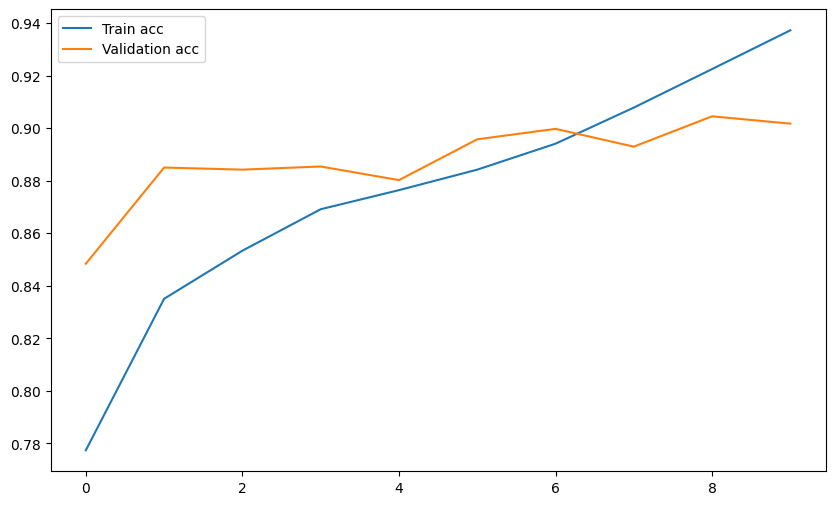

In [19]:
plt.figure(figsize=[10,6])
plt.plot(hist.history["accuracy"], label = "Train acc")
plt.plot(hist.history["val_accuracy"], label = "Validation acc")
plt.legend()
plt.show()

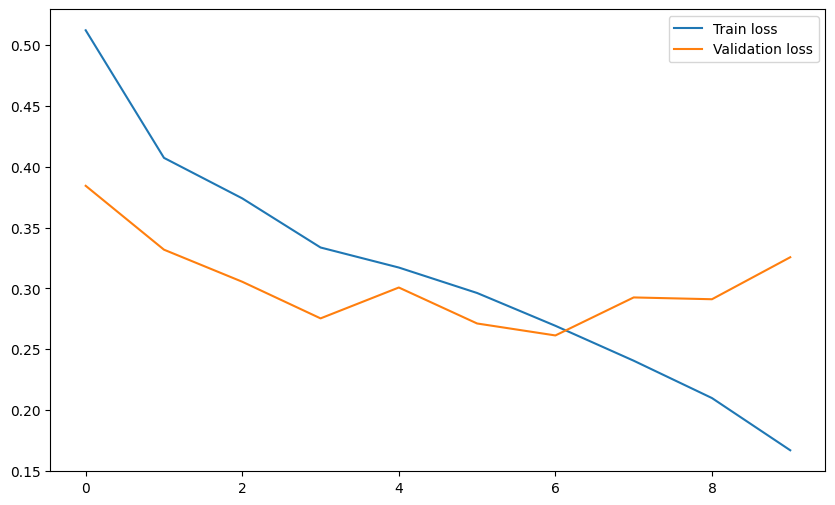

In [20]:
plt.figure(figsize=(10,6))
plt.plot(hist.history['loss'], label = "Train loss")
plt.plot(hist.history['val_loss'], label = "Validation loss")
plt.legend()
plt.show()

In [21]:
def predict_func(img):


    plt.figure(figsize=(6,4))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.tight_layout()
    img = cv2.resize(img, (224, 224))
    img = np.reshape(img, [-1, 224, 224,3])
    result = np.argmax(model.predict(img))
    if result == 0: print("\033[94m"+"This image -> Recyclable"+"\033[0m")
    elif result == 1: print("\033[94m"+"This image -> Organic"+"\033[0m")


In [26]:
from cv2 import (VideoCapture, namedWindow, imshow, waitKey, destroyWindow, imwrite)

cam_port = 0
cam = VideoCapture(cam_port)

# reading the input using the camera
result, image = cam.read()



# If image will detected without any error,
# show result
if result:

	# showing result, it take frame name and image
	# output
	imshow("GeeksForGeeks", image)

	# saving image in local storage
	imwrite("GeeksForGeeks.png", image)

	# If keyboard interrupt occurs, destroy image
	# window
	waitKey(0)
	destroyWindow("GeeksForGeeks")

# If captured image is corrupted, moving to else part
else:
	print("No image detected. Please! try again")


No image detected. Please! try again
